**Week:** 12

**Assignment from Group:** Uptight Wealth

**Link:** https://github.com/Micniks/Python-Week12-Group-3-Assignments

# The Necromancer Recruitment Service

## Assignment 1: Prepare the Ritual

For the Perceptron, we are going to need a activation_function, and a perceptron_function

1. Make an activation_function, that takes a value, and return 1 if the value > 0, and otherwise returns 0
2. Test the activation_function, using an array of numbers from -3 to 3, with an increment of 0,3. Plot the results, to give a visual indication of the response from the activation_function
3. Make a perceptron_function, that takes two arrays, inputs and weights for those inputs, and returns a sum from the dotted outcome of the arrays.
4. Test the perceptron_function, by feeding it the following, and get 26 as the result:
```python
perceptron_function([3,4,5], [1,2,3])
```

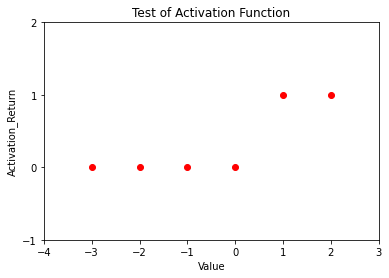

1


In [66]:
import matplotlib.pyplot as plt
import numpy as np

#1.1
def activation_function(v):
    if v > 0:
        return 1
    else:
        return 0

#1.2
for idx in range(-3,3):
    plt.scatter(idx, activation_function(idx), c='r')

plt.xticks(np.arange(-4, 4, 1))
plt.yticks(np.arange(-1, 3, 1))
plt.title('Test of Activation Function')
plt.xlabel('Value')
plt.ylabel('Activation_Return')
plt.show()

#1.3
def perceptron_function(arr1, arr2):
    n_arr1 = np.array(arr1)
    n_arr2 = np.array(arr2).T
    result = n_arr1.dot(n_arr2)
    #result = sum([i * w for i, w in zip(arr1, arr2)])
    #return result
    return activation_function(result)

#1.4
print(perceptron_function([3,4,5], [1,2,3]))

## Assignment 2: Judge the bodies
1. Read in the dataset undeads.csv into a pandas dataframe, and display the dataset.
2. Make a new scatter plot with datapoints of Age vs Durability from the dataset. Choose different colors for Zombie and Skeleton
3. Now change the 'Type' column to represent Zombie as 1 and Skeleton as 0
4. Use these weights herè in order [-9, 7], [-8, 7], [-7, 7] to determine if the following 5 undeads are skeletons or zombies:
```python
[[47, 41.2, 'Skeleton'], [44, 76.0, 'Zombie'], [59, 36.4, 'Skeleton'], [52, 68.0, 'Zombie'], [51, 39.6, 'Skeleton']]
```
5. Which of the three weights get's the most correct?
6. Find the (approximately) optimal weights using the perceptron learning algorithm
7. Plot the division line

In [60]:
import pandas as pd

#2.1
url = 'https://raw.githubusercontent.com/Micniks/Python-Week12-Group-3-Assignments/main/undeads.csv'
data = pd.read_csv(url)
display(data)

,Age,Durability,Type
0,70,34.24,Skeleton
1,50,39.60,Skeleton
2,53,33.76,Skeleton
3,47,63.51,Zombie
4,51,76.59,Zombie
...,...,...,...
155,55,78.65,Zombie
156,40,41.80,Skeleton
157,50,46.40,Skeleton
158,44,50.46,Skeleton


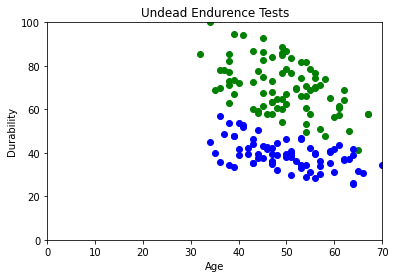

In [61]:
#2.2
for row in data.iterrows():
    row_idx = row[0]
    row_data = row[1]
    undead_age = row_data['Age']
    undead_dur = row_data['Durability']
    undead_type = row_data['Type']
    undead_color = 'b'
    if undead_type == 'Zombie':
        undead_color = 'g'
    
    plt.scatter(undead_age, undead_dur, c=undead_color)
    
plt.axis([0, 70, 0, 100])
plt.title('Undead Endurence Tests')
plt.xlabel('Age')
plt.ylabel('Durability')
plt.show()

In [62]:
#2.3
data = pd.read_csv(url)

undead_dict = {"Zombie": 1, "Skeleton": 0}
data['Type'].replace(undead_dict, inplace=True)
display(data)

,Age,Durability,Type
0,70,34.24,0
1,50,39.60,0
2,53,33.76,0
3,47,63.51,1
4,51,76.59,1
...,...,...,...
155,55,78.65,1
156,40,41.80,0
157,50,46.40,0
158,44,50.46,0


In [70]:
#2.4 & 2.5
weights = [[-9, 7], [-7, 5], [-6, 7]]
inputs = [[47, 41.2, 'Skeleton'], [44, 76.0, 'Zombie'], [59, 36.4, 'Skeleton'], [52, 68.0, 'Zombie'], [51, 39.6, 'Skeleton']]

for weight in weights:
    correct_guesses = 0
    wrong_skeleton_guess = 0
    wrong_zombie_guess = 0
    for inp in inputs:
        result = perceptron_function([inp[0], inp[1]],weight)
        if result == undead_dict[inp[2]]:
            correct_guesses += 1
        else:
            if undead_dict[inp[2]] == 0:
                wrong_skeleton_guess += 1
            elif undead_dict[inp[2]] == 1:
                wrong_zombie_guess += 1

    print('Weight', weight, 'got the following:')
    print('Correct guesses:', correct_guesses)
    print('Wrong guessed Skeletons:', wrong_skeleton_guess)
    print('Wrong guessed Zombies:', wrong_zombie_guess)
    print()

Weight [-9, 7] got the following:
Correct guesses: 5
Wrong guessed Skeletons: 0
Wrong guessed Zombies: 0

Weight [-7, 5] got the following:
Correct guesses: 4
Wrong guessed Skeletons: 0
Wrong guessed Zombies: 1

Weight [-6, 7] got the following:
Correct guesses: 4
Wrong guessed Skeletons: 1
Wrong guessed Zombies: 0



In [92]:
#2.6


1
3
